<a href="https://colab.research.google.com/github/dmuman/ML-labs/blob/main/lab3/lab3_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Імпорт необхідних бібліотек

* `numpy` для операцій з масивами
* `pandas` для роботи з даними

In [220]:
import numpy as np
import pandas as pd

# Завдання 1: Ознайомлення з набором даних

Необхідно:
* Завантажити набір даних.
* Оцінити кількість спостережень та кількість змінних
* визначити типи даних у кожній колонці.

У висновках необхідно зазначити:
* загальну кількість спостережень та змінних у наборі даних;
* типи даних кожної змінної (наприклад, числовий, текстовий, булевий);
* короткий опис виявлених особливостей набору даних (наприклад, наявність відсутніх значень, неочікувані типи даних у певних колонках).

## Завантаження датасету

Датасет буде завантажено у "сирому" форматі по посиланню з гітхабу:

In [221]:
# посилання на "сирий" файл
url = 'https://raw.githubusercontent.com/OlhaOsypova/Machine-Learning-and-Data-Analytics/refs/heads/main/Topic_4_regression/Task/clients_LTV.csv'

# створення датафрейму
df = pd.read_csv(url)

# перегляд перших 5 рядків
df.head()

,Unnamed: 0,Customer_ID,Age,Location,Income_Level,Total_Transactions,Avg_Transaction_Value,Max_Transaction_Value,Min_Transaction_Value,Total_Spent,...,Last_Transaction_Days_Ago,Loyalty_Points_Earned,Referral_Count,Cashback_Received,App_Usage_Frequency,Preferred_Payment_Method,Support_Tickets_Raised,Issue_Resolution_Time,Customer_Satisfaction_Score,LTV
0,0,cust_0000,54,Urban,Low,192,16736.38402319893$,60216.83450988285$,6525.814860765247$,3.213386e+06,...,209,2114.0,25,2224.012140,Monthly,Debit Card,3,61.568590,1,3.279546e+05
1,1,cust_0001,67,Suburban,High,979,14536.734682848608$,48350.10027249861$,2186.742245256916$,1.423146e+07,...,240,2960.0,20,4026.823518,Monthly,UPI,17,60.392889,8,1.437053e+06
2,2,cust_0002,44,Urban,High,329,7061.372800216672$,32521.157187328816$,2743.4068078554915$,NaN,...,21,3170.0,0,1441.011395,NaN,Debit Card,11,45.305579,4,2.419387e+05
3,3,cust_0003,30,Rural,High,71,16426.876453277957$,17827.896720459485$,4360.78499399125$,NaN,...,285,NaN,35,4365.855580,NaN,Wallet Balance,6,22.030191,1,1.284599e+05
4,4,cust_0004,58,Urban,Middle,878,10800.09265965521$,17497.634533762135$,4532.872520080136$,9.482481e+06,...,329,1992.0,18,4161.523827,Daily,UPI,18,20.634723,5,9.569514e+05


Тепер переглянемо інформацію про датафрейм:

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   7000 non-null   int64  
 1   Customer_ID                  7000 non-null   object 
 2   Age                          7000 non-null   int64  
 3   Location                     6650 non-null   object 
 4   Income_Level                 6510 non-null   object 
 5   Total_Transactions           7000 non-null   int64  
 6   Avg_Transaction_Value        7000 non-null   object 
 7   Max_Transaction_Value        7000 non-null   object 
 8   Min_Transaction_Value        7000 non-null   object 
 9   Total_Spent                  5950 non-null   float64
 10  Active_Days                  7000 non-null   int64  
 11  Last_Transaction_Days_Ago    7000 non-null   int64  
 12  Loyalty_Points_Earned        6370 non-null   float64
 13  Referral_Count    

## Висновки щодо датафрейму

Датафрейм містить $7000$ входжень (рядків) у $21$ колонці.

У ньому є $13$ колонок з числовими типами даних ($5$ типу `float` та $8$ типу `int`), а також $8$ текстових (категоріальних).

Приблизно половина колонок містить пропуски. В районі $5-10$ відсотків.

Також можна помітити, що колонки `Avg_Transaction_Value`, `Max_Transaction_Value` та `Min_Transaction_Value` випадково визначені як текстові (через символ `'$'` в кінці), хоча мають бути числовими.

# Завдання 2: Препроцесинг даних

Необхідно:
* Видалити зайві стовпчики, які не потрібні для аналізу та прогнозування LTV.
* Заповнити пропуски в даних, використовуючи відповідні методи (середнє, медіану або моду).
* В трьох стовпчиках, де дані збережені у текстовому форматі, але повинні бути числовими (наприклад, через наявність символів або некоректне форматування), виправити тип даних на числовий.

## Фунції для полегшення роботи

Задля полегшення подальшої роботи з другим сетом даних та загальної оптимізації й зменшення об'єму коду, я напишу функції, які будуть використані для кожного з цих завдань.

Усі функції не мінятимуть оригінальний фрейм, а повертатиме його копію (як і майже усі методи `pandas`)

Спершу фукнція, яка конвертуватиме категоріальні колонки на числові:

In [223]:
def convertCatToNum(dataframe: pd.DataFrame, columns_to_change: list, sign_to_change: str, new_sign: str) -> pd.DataFrame:
  """
  Отримує датафрейм, список колонок, які треба змінити,
  символ, який потрібно замінити та символ, на який його треба замінити.

  Повертає датафрейм із конвертованими колонками.
  """
  converted_df = dataframe.copy() # копіюємо фрейм
  regex = r'[^\d\.]'              # створюємо регулярний вираз

  # ітерування по колонках
  for column in columns_to_change:
    # заміна символів
    converted_df[column] = converted_df[column].str.replace(sign_to_change, new_sign, regex=False)
    # зміна текстової колонки на числову (float)
    converted_df[column] = converted_df[column].astype(float)

  # повертаємо фрейм
  return converted_df

Далі функціЇ, яка заповнюватимуть пропущені числові та текстові значення:

In [224]:
def fillNaNNumerical(dataframe: pd.DataFrame, column_to_group_by: str, trans_method: str) -> pd.DataFrame:
  """
  Отримує датафрейм, ім'я колонки, по якій треба згрупувати
  та метод транформації.

  Повертає датафрейм із заповненими числовими колонками.
  """
  # копія фрейму
  filled_df = dataframe.copy()
  # виділяємо числові колонки
  numerical_columns = filled_df.select_dtypes([float, int]).columns

  # ітерування по колонках
  for column in numerical_columns:
    # заповнення пропущених значень по наданому методу трасформації
    filled_df.loc[:, column] = filled_df[column].fillna(filled_df.groupby(column_to_group_by)[column].transform(trans_method))

  # повертаємо фрейм
  return filled_df


def fillNaNCategorical(dataframe: pd.DataFrame, columns_to_fill: list) -> pd.DataFrame:
  """
  Отримує датафрейм та список імен колонок, які треба заповнити.

  Повертає датафрейм із заповненими текстовими колонками.
  """
  # копія фрейму
  filled_df = dataframe.copy()

  # ітерування по колонках
  for column in columns_to_fill:
    # заміна пропущених значень модою -- найпопулярнішим значенням
    filled_df.loc[:, column] = filled_df[column].fillna(filled_df[column].mode()[0])

  # повертаємо фрейм
  return filled_df

Тепер функція, яка буде очищати датафрейм:

In [225]:
def cleanDataframe(dataframe: pd.DataFrame, columns_to_delete = []) -> pd.DataFrame:
  """
  Отримує датафрейм та список імен колонок, які треба видалити.
  За замовчуванням це пустий список.

  Видаляє необхідні колонки, викиди в даних (по квантилях),
  а також колонки, в яких є більше 50% пропусків.

  Повертає очищений
  """
  # копія фрейму
  df_cleaned = dataframe.copy()

  # перевірка, чи список колонок для видалення не пустий
  if len(columns_to_delete) != 0:
    # видалення колонок, якщо вони вказані
    df_cleaned.drop(columns_to_delete, axis=1, inplace=True)

  # виділення числових колонок
  numerical_columns = df_cleaned.select_dtypes(include=[float, int]).columns

  # ітерування по числових колонках
  for column in numerical_columns:
    # оголошення нижнього та верхнього квантилів на рівні 5% та 95% відповідно
    lower_bound = df_cleaned[column].quantile(0.05)
    upper_bound = df_cleaned[column].quantile(0.95)

    # створення фрейму без цих квантилів
    df_without_bounds = df_cleaned[((df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)) | (df_cleaned[column].isna())]

  # перепризначення фрейму
  df_cleaned = df_without_bounds
  # видалення колонок, які містять більше 50% пропусків
  df_cleaned = df_cleaned.dropna(thresh = len(df_cleaned) * 0.5, axis=1)

  # повертаємо датафрейм
  return df_cleaned

А також додаткова маленька функція для визначення X та y (яка також оновлює їхні індекси):

In [226]:
def getX_y(dataframe: pd.DataFrame, y_column: str) -> tuple([pd.DataFrame, pd.DataFrame]):
  """
  Отримує датафрейм та цільову колонку, яка має бути y.

  Повертає два фрейми, які відповідають за X та y.
  """
  # видалення y колонки з X
  X = dataframe.drop([y_column], axis=1)
  # призначення y колонки
  y = dataframe[y_column]

  # перевизначення індексів фреймів, аби вони співпадали з кількістю входжень
  X.index = range(dataframe.shape[0])
  y.index = range(dataframe.shape[0])

  # повертаємо два фрейми (кортеж)
  return X, y

## Очищення даних, зміна їх форматів, заповнення

А тепер до дій. Проведемо всі операції, які необхідні у завданні, але тепер за допомогою функцій:

In [227]:
# спершу замінимо текстові колонки на числові
# робимо список потрібних колонок (їх було взято з аналізу head())
columns_to_change = ['Avg_Transaction_Value', 'Max_Transaction_Value', 'Min_Transaction_Value']
# конвертуємо колонки
df = convertCatToNum(df, columns_to_change, '$', '')

# тепер заповнюємо чилові та текстові колонки
df = fillNaNNumerical(df, 'Age', 'mean')
# виділяємо необхідні текстові колонки
columns_to_fill = ['Income_Level', 'App_Usage_Frequency']
df = fillNaNCategorical(df, columns_to_fill)

# виділяємо колонки, які треба видалити
columns_to_delete = ['Unnamed: 0', 'Customer_ID', 'Location']
# та очищаємо фрейм
df = cleanDataframe(df, columns_to_delete)

Перевіримо, як спрацювали функції:

In [228]:
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6300 entries, 0 to 6999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          6300 non-null   int64  
 1   Income_Level                 6300 non-null   object 
 2   Total_Transactions           6300 non-null   int64  
 3   Avg_Transaction_Value        6300 non-null   float64
 4   Max_Transaction_Value        6300 non-null   float64
 5   Min_Transaction_Value        6300 non-null   float64
 6   Total_Spent                  6300 non-null   float64
 7   Active_Days                  6300 non-null   int64  
 8   Last_Transaction_Days_Ago    6300 non-null   int64  
 9   Loyalty_Points_Earned        6300 non-null   float64
 10  Referral_Count               6300 non-null   int64  
 11  Cashback_Received            6300 non-null   float64
 12  App_Usage_Frequency          6300 non-null   object 
 13  Preferred_Payment_Metho

(   Age Income_Level  Total_Transactions  Avg_Transaction_Value  \
 0   54          Low                 192           16736.384023   
 2   44         High                 329            7061.372800   
 3   30         High                  71           16426.876453   
 4   58       Middle                 878           10800.092660   
 5   23       Middle                 741            6093.162427   
 
    Max_Transaction_Value  Min_Transaction_Value   Total_Spent  Active_Days  \
 0           60216.834510            6525.814861  3.213386e+06          140   
 2           32521.157187            2743.406808  5.676575e+06           73   
 3           17827.896720            4360.784994  4.838469e+06          299   
 4           17497.634534            4532.872520  9.482481e+06          236   
 5           21310.858876            2069.642242  4.515033e+06          195   
 
    Last_Transaction_Days_Ago  Loyalty_Points_Earned  Referral_Count  \
 0                        209             2114.0

## Висновки щодо препроцесингу

Таким чином, було випралено типи даних трьох необхідних колонок, заповнено пропущені числові та текстові значення, а також проведено очистку фрейму (видалення непотрібних колонок, видалення квантелів)

# Завдання 3: Реалізація алгоритмів регресії та оцінка якості реалізованих алгоритмів

Необхідно:
* Реалізувати кілька різних алгоритмів регресії (лінійна регресія, дерево рішень, метод найближчих сусідів тощо). * Навчити моделі на наявних даних, використовуючи LTV як цільову змінну.
* Оцінити якість кожної моделі за допомогою метрики R2. * Порівняти результати та вибрати найкращу модель за метрикою R2.

У висновках необхідно надати загальну оцінку якості побудованих моделей та зробити заключення щодо їх придатності для подальшого використання:
* чи можна ці моделі застосовувати для прогнозування LTV на нових даних,
* чи є необхідність у подальшому вдосконаленні.

## Виділення матриці незалежних змінних та вектору залежної змінної

Спершу виділимо наш X (дані, на яких модель буде навчатить) та y (дані, яка модель буде передбачати на основі X). У нас вже є функція для цього:

In [229]:
X, y = getX_y(df, 'LTV') # виділяємо матрицю незалежних змінних та вектор залежної змінної

## Стандартизація та кодування

Для подальшого навчання моделей необхідно спочатку стандартизувати дані. Допоможуть у цьому `StandardScaler` та `OneHotEncoder` з бібліотеки `sklearn.preprocessing`.

З тієї ж причини, що й раніше, я напишу функцію, яка стандартизуватиме датафрейм:

In [230]:
# імпорт стандаризаторів
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

def standardizeDF(dataframe: pd.DataFrame, numerical_columns: list, categorical_columns: list) -> pd.DataFrame:
  """
  Отримує датафрейм список числових та категоріальних колонок.

  Проводить стандартизацію над числовими даними
  та кодування над текстовими.

  Повертає стандартизований та закодований фрейм.
  """
  # копія фрейму
  stand_enc_df = dataframe.copy()

  # оголошення скейлера для числових даних
  scaler_numerical = StandardScaler()

  # застосування StandardScaler до кількісних стовпців
  standardized_columns = scaler_numerical.fit_transform(stand_enc_df[numerical_columns])

  # перетворення стандартизованих даних в датафрейм з відповідними назвами стовпців
  standardized_stand_enc_df = pd.DataFrame(standardized_columns, columns=numerical_columns, index=stand_enc_df.index)

  # видалення початкових кількісних ознак
  stand_enc_df = stand_enc_df.drop(columns=numerical_columns)

  # додавання стандартизованих ознак назад в датафрейм
  stand_enc_df = pd.concat([stand_enc_df, standardized_stand_enc_df], axis=1)

  # оголошення кодувальника для категоріальних даних
  encoder_categorical = OneHotEncoder(sparse_output=False, drop='first')

  # застосування OneHotEncoder до категоріальних стовпців
  encoded_columns = encoder_categorical.fit_transform(stand_enc_df[categorical_columns])

  # створення нового фрейму з перекодованими змінними та назвами колонок
  encoded_stand_enc_df = pd.DataFrame(encoded_columns, columns=encoder_categorical.get_feature_names_out(categorical_columns))

  # об'єднання початкового фрейму з перекодованими стовпцями
  stand_enc_df = stand_enc_df.drop(columns=categorical_columns)
  stand_enc_df = pd.concat([stand_enc_df, encoded_stand_enc_df], axis=1)

  # повертаємо фрейм
  return stand_enc_df


Тепер можна провести стандартизацію та кодування фрейму:

In [231]:
# обираємо текстові та числові колонки
numerical_columns = X.select_dtypes(include=[float, int]).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# проводимо стандартизацію та кодування
X = standardizeDF(X, numerical_columns, categorical_columns)

# виведення результатів
X.head()

,Age,Total_Transactions,Avg_Transaction_Value,Max_Transaction_Value,Min_Transaction_Value,Total_Spent,Active_Days,Last_Transaction_Days_Ago,Loyalty_Points_Earned,Referral_Count,...,Support_Tickets_Raised,Issue_Resolution_Time,Customer_Satisfaction_Score,Income_Level_Low,Income_Level_Middle,App_Usage_Frequency_Monthly,App_Usage_Frequency_Weekly,Preferred_Payment_Method_Debit Card,Preferred_Payment_Method_UPI,Preferred_Payment_Method_Wallet Balance
0,0.729520,-1.128009,1.254409,1.433746,1.705491,-0.456551,-0.406211,0.236785,-0.294421,0.013842,...,-1.168429,1.229388,-1.571932,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.087130,-0.621682,-0.517719,0.120452,-0.099668,0.277617,-1.043523,-1.545908,0.474535,-1.700047,...,0.160590,0.431562,-0.525085,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,-0.812215,-1.575204,1.197718,-0.576284,0.672228,0.027815,1.106215,0.957448,-0.059941,0.699397,...,-0.670047,-0.710274,-1.571932,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.986476,1.407326,0.167086,-0.591944,0.754357,1.411989,0.506952,1.374674,-0.383258,-0.466047,...,1.323481,-0.778733,-0.176136,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-1.261888,0.900998,-0.695061,-0.411126,-0.421223,-0.068587,0.116955,-0.863175,0.518954,-1.357269,...,-0.670047,-0.945538,1.568608,0.0,1.0,0.0,0.0,0.0,1.0,0.0


Можна помітити, що числові дані було стандартизовано, а текстові перекодовано в $0$ та $1$ (матрицю відповідностей).

## Розбивання сету

А тепер до самих алгоритмів машинного навчання.

Спочатку треба стандартизувати цільову змінну:

In [232]:
# стандартизуємо цільову змінну, попередньо перетворивши її в масив NumPy
y_array = y.to_numpy().reshape(-1, 1)

# стандартизуємо за допомогою StandardScaler
target_scaler = StandardScaler()
y_scaled = target_scaler.fit_transform(y_array)

Тепер поділимо дані на навчальні та тренувальні вибірки:

In [233]:
# розбиття даних на навчальну і тестову вибірки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

Далі імпортуємо всі необхідні бібліотеки:
* лінійної регресії
* дерева рішень
* випадкового ліcу
* k найближчих сусідів

А також для підрахунку точності моделі (r2)

In [234]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

## Проведення машинного навчання та оцінка результатів

Тепер перейдемо до створення списку моделей та написання функції для їх навчання й оцінювання їх передбачень:

In [235]:
# спершу буде створено список необхідних регрессорів
# аби по ньому можна було легко ітерувати в подальшому
regression_models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    KNeighborsRegressor()
]

# створюємо також пусті списки для навчальних
# та тестових оцінок
training_scores = []
testing_scores = []

# функція для проведення передбачень моделлю
def model_prediction(model, x_train: pd.DataFrame, y_train: np.ndarray, x_test: pd.DataFrame, y_test: np.ndarray) -> None:
  """
  Навчає моделі та перевіряє їх якість за допомогою
  метрики R2.

  Виводить результати навчання моделі.
  """
  model.fit(x_train, y_train.reshape(-1))     # навчання моделі на тренувальній вибірці
  x_train_pred = model.predict(x_train)       # прогноз цільової змінної на тренувальній вибірці
  x_test_pred = model.predict(x_test)         # прогноз цільової змінної на тестові вибірці
  a = r2_score(y_train, x_train_pred) * 100   # розрахунок r2 на тренувальній вибірці
  b = r2_score(y_test, x_test_pred) * 100     # розрахунок r2 на тестовій вибірці
  training_scores.append(a)                   # поповнення спискій оцінок
  testing_scores.append(b)

  # виведення результатів на екран
  print(f'R2 для {type(model).__name__} моделі на навчальному наборі даних: {a:.2f}')
  print(f'R2 для {type(model).__name__} моделі на тестовому наборі даних: {b:.2f}')

А тепер можна і навчати моделі:

In [236]:
# ітерування по моделях
for model in regression_models:
  # назва моделі
  print(f'Оцінювання {type(model).__name__} моделі: ')
  # передбачення моделі
  model_prediction(model, X_train, y_train, X_test, y_test)
  print('\n')

# вибір найкращої моделі виходячи з тестових оцінок
best_model_index = testing_scores.index(max(testing_scores))
best_model = regression_models[best_model_index]
best_test_score = testing_scores[best_model_index]

# вивід кращої моделі та її оцінки r2
print(f'Найкращою моделлю є {type(best_model).__name__} з R2 {best_test_score:.2f} на тестовому наборі даних.')

Оцінювання LinearRegression моделі: 
R2 для LinearRegression моделі на навчальному наборі даних: 92.12
R2 для LinearRegression моделі на тестовому наборі даних: 91.07


Оцінювання DecisionTreeRegressor моделі: 
R2 для DecisionTreeRegressor моделі на навчальному наборі даних: 100.00
R2 для DecisionTreeRegressor моделі на тестовому наборі даних: 98.96


Оцінювання RandomForestRegressor моделі: 
R2 для RandomForestRegressor моделі на навчальному наборі даних: 99.97
R2 для RandomForestRegressor моделі на тестовому наборі даних: 99.69


Оцінювання KNeighborsRegressor моделі: 
R2 для KNeighborsRegressor моделі на навчальному наборі даних: 92.12
R2 для KNeighborsRegressor моделі на тестовому наборі даних: 88.54


Найкращою моделлю є RandomForestRegressor з R2 99.69 на тестовому наборі даних.


## Висновки щодо моделей

В загальному усі моделі справились дуже добре (кожна має більше $90\%$ точності. Добре, якщо з першого разу виходить отримати хоча б $70\%$). Проте, найкраще себе показала модель випадкового лісу з результатом у $99.7\%$ на тестовому наборі даних. Це надзвичайно високий та хороший результат. З такою точністю модель точно готова до того, аби "побачити" раніше невідомі дані, які вже не матимуть шуканого значення.

Вдосконалити моделі можна, але не дуже потрібно.

## Найважливіші ознаки

Можна також переглянути, які змінні для моделі були найважливішими. Оскільки у моєму випадку переміг випадковий ліс, то для цього можна використати атрибут `feature_importances_`:

In [237]:
# імпорт графічних бібліотек
import matplotlib.pyplot as plt
import seaborn as sns

# графік відображаємо в блокноті
%matplotlib inline

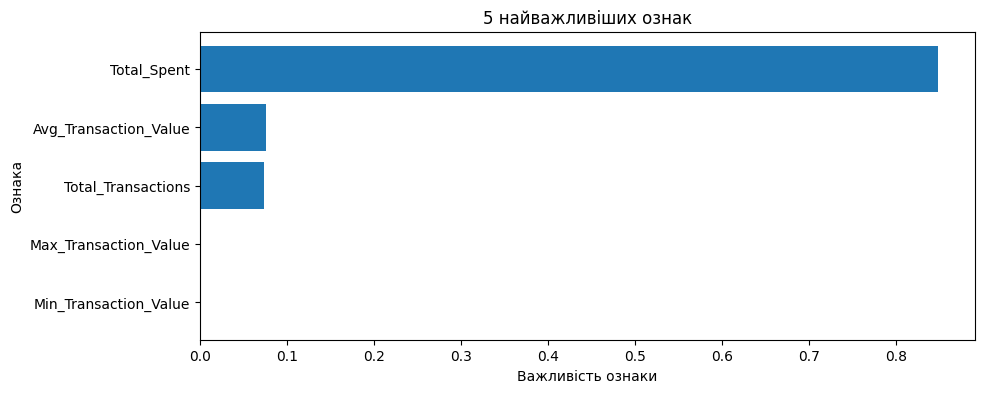

In [238]:
# моя найкраща модель
best_model = RandomForestRegressor(n_estimators=100).fit(X_train, y_train.reshape(-1))
# вибір найважливіших ознак
importance = best_model.feature_importances_
# індекси 5 найважливіших ознак
top_5_indices = np.argsort(importance)[-5:]
top_features = X.columns[top_5_indices]

# візуалізація важливості 5 найважливіх ознак
plt.figure(figsize=(10, 4))
plt.barh(range(len(top_5_indices)), importance[top_5_indices], align='center')
plt.yticks(range(len(top_5_indices)), top_features)
plt.xlabel('Важливість ознаки')
plt.ylabel('Ознака')
plt.title('5 найважливіших ознак')
plt.show()

## Висновки про найважливіші ознаки

Таким чином, найважливішими (або взагалі важливими) є лише три ознаки: `Total_Spent`, `Avg_Transaction_Value` та `Total_Transactions`.

# Завдання 4: Прогнозування LTV для нових клієнтів

Необхідно на основі найкращої моделі зробити прогноз LTV для вибраних клієнтів.

## Завантаження сету

Знову-таки, беремо файл з гітхабу:


In [239]:
# посилання на файл
url_to_estimate = 'https://raw.githubusercontent.com/OlhaOsypova/Machine-Learning-and-Data-Analytics/refs/heads/main/Topic_4_regression/Task/clients_to_estimate.csv'

# створення фрейму
df_to_estimate = pd.read_csv(url_to_estimate)

# виведення перших 5 рядків
df_to_estimate.head()

,Customer_ID,Age,Location,Income_Level,Total_Transactions,Avg_Transaction_Value,Max_Transaction_Value,Min_Transaction_Value,Total_Spent,Active_Days,Last_Transaction_Days_Ago,Loyalty_Points_Earned,Referral_Count,Cashback_Received,App_Usage_Frequency,Preferred_Payment_Method,Support_Tickets_Raised,Issue_Resolution_Time,Customer_Satisfaction_Score
0,cust_0860,50,Suburban,High,543,596.0589994879316$,1714.784777545023$,268.7142321224972$,3.236600e+05,250,361,2635,41,2019.948149,Daily,Debit Card,18,61.008314,6
1,cust_1604,66,Rural,Low,456,8800.17546689406$,38807.641761083454$,3153.691081237037$,4.012880e+06,349,211,1873,0,3163.905402,Daily,Debit Card,15,32.988608,8
2,cust_2245,46,Rural,Middle,754,1121.5742185939405$,3098.426240656642$,471.99152959088167$,8.456670e+05,43,274,4109,22,1515.538464,Weekly,Wallet Balance,4,16.183854,7
3,cust_6912,19,Urban,Middle,5,808.7034199851265$,3662.9134062873377$,204.50832004409645$,4.043517e+03,338,154,2939,25,3082.997460,Daily,UPI,20,51.023975,9
4,cust_0413,57,Rural,Middle,689,8577.766769212436$,31928.151472187823$,1996.522068052728$,5.910081e+06,330,15,557,21,189.162256,Daily,Wallet Balance,13,41.551875,9


Можна помітити, що у фреймі цього разу відсутня колонка `LTV`. Це значить, що модель вже буде не вчитись і навіть не тестуватись, а прямо-таки використовуватись.

In [240]:
df_to_estimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  50 non-null     object 
 1   Age                          50 non-null     int64  
 2   Location                     50 non-null     object 
 3   Income_Level                 50 non-null     object 
 4   Total_Transactions           50 non-null     int64  
 5   Avg_Transaction_Value        50 non-null     object 
 6   Max_Transaction_Value        50 non-null     object 
 7   Min_Transaction_Value        50 non-null     object 
 8   Total_Spent                  50 non-null     float64
 9   Active_Days                  50 non-null     int64  
 10  Last_Transaction_Days_Ago    50 non-null     int64  
 11  Loyalty_Points_Earned        50 non-null     int64  
 12  Referral_Count               50 non-null     int64  
 13  Cashback_Received     

Також можна помітити, що кількість входжень в цьому фреймі набагато менша ($7000$ проти $50$).

## Препроцесинг фрейму

Оскільки це фрейм з абсолютно новими клієнтами, не треба нічого очищати. Запонювати пропущені значення також не треба, оскільки їх немає.

Все, що треба зробити - це видалити непотрібні колонки та змінити формати колонок, які були помилково інтерпретовані як текстові. В цьому випадку це ті самі колонки:

P.S.: мої зусилля з автоматизації та полегшення були марними і я лише зараз це зрозумів. Під час того, як мишу документацію. Сумно..

In [241]:
columns_to_change = ['Avg_Transaction_Value', 'Max_Transaction_Value', 'Min_Transaction_Value']
df_to_estimate = convertCatToNum(df_to_estimate, columns_to_change, '$', '')

# df_to_estimate = fillNaNNumerical(df_to_estimate, 'Age', 'mean')

# columns_to_fill = ['Income_Level', 'App_Usage_Frequency']
# df_to_estimate = fillNaNCategorical(df_to_estimate, columns_to_fill)

columns_to_delete = ['Customer_ID', 'Location']
df_to_estimate = df_to_estimate.drop(columns_to_delete, axis=1)

# df_to_estimate = cleanDataframe(df_to_estimate, columns_to_delete)

In [242]:
# df_to_estimate.index = range(df_to_estimate.shape[0])

## Стандартизація та кодування фрейму

Тепер стандартизуємо числові та закодуємо текстові дані:

In [243]:
# виділяємо текстові та числові дані
numerical_columns = df_to_estimate.select_dtypes(include=[float, int]).columns
categorical_columns = df_to_estimate.select_dtypes(include=['object']).columns

# проводимо стандартизацію та кодування
df_to_estimate = standardizeDF(df_to_estimate, numerical_columns, categorical_columns)

## Проведення прогнозування

А тепер проведемо прогноз нових значень LTV:

In [244]:
pred_scaled = best_model.predict(df_to_estimate)
pred_scaled

array([-8.96070335e-01, -4.17369472e-02, -7.77343605e-01, -9.60575106e-01,
        3.72424119e-01,  6.31448697e-01,  1.71263224e+00, -9.35058868e-01,
        1.53877670e-01,  2.56588622e+00, -3.82474125e-02, -8.39034985e-01,
       -3.75276866e-01, -9.12909828e-01, -9.35981166e-01,  1.13427010e-01,
       -8.48256643e-01,  1.11816431e+00, -6.64916192e-01,  1.27912007e+00,
        1.01901795e+00, -2.53249791e-02, -9.83994531e-02, -8.67203935e-01,
        4.16350541e-01, -4.90320549e-01, -5.35963467e-01, -1.05207647e-03,
        1.17225826e+00,  1.36576752e+00, -4.03367708e-01, -8.46064352e-01,
        9.76369688e-01,  1.86334664e+00, -1.46536190e-01, -6.04805200e-01,
        5.56156775e-01, -1.77492454e-01, -9.63437042e-01, -8.89026917e-01,
       -3.20697806e-01, -8.62219354e-01, -4.45462900e-01,  1.04758861e-01,
       -9.06002439e-01, -4.55805379e-01, -6.79650523e-01,  1.58653431e+00,
        9.52035695e-01,  1.27371763e+00])

## Виведення результатів

Тепер треба повернути дані зі стандартизованих назад у зрозумілі одиниці. Для цього можна використати метод `inverse_transform()`:

In [245]:
# обернене перетворення спрогнозованих даних до реальних одиниць
pred_real_units = target_scaler.inverse_transform(pred_scaled.reshape(-1, 1))

# виведення результатів
print('Спрогнозовано, що LTV нових клієнтів буде: ')
for i in range(len(pred_real_units)):
  print(f'Клієнт {i+1}: {pred_real_units[i][0]:.2f}')

Спрогнозовано, що LTV нових клієнтів буде: 
Клієнт 1: 153324.01
Клієнт 2: 463190.66
Клієнт 3: 196386.19
Клієнт 4: 129928.14
Клієнт 5: 613406.85
Клієнт 6: 707355.04
Клієнт 7: 1099500.22
Клієнт 8: 139182.88
Клієнт 9: 534140.07
Клієнт 10: 1408975.37
Клієнт 11: 464456.32
Клієнт 12: 174010.73
Клієнт 13: 342215.76
Клієнт 14: 147216.33
Клієнт 15: 138848.36
Клієнт 16: 519468.62
Клієнт 17: 170666.04
Клієнт 18: 883886.75
Клієнт 19: 237163.60
Клієнт 20: 942265.39
Клієнт 21: 847926.37
Клієнт 22: 469143.28
Клієнт 23: 442639.18
Клієнт 24: 163793.85
Клієнт 25: 629338.95
Клієнт 26: 300489.43
Клієнт 27: 283934.74
Клієнт 28: 477947.06
Клієнт 29: 903506.62
Клієнт 30: 973692.41
Клієнт 31: 332027.21
Клієнт 32: 171461.18
Клієнт 33: 832457.85
Клієнт 34: 1154164.32
Клієнт 35: 425179.98
Клієнт 36: 258965.85
Клієнт 37: 680046.66
Клієнт 38: 413952.15
Клієнт 39: 128890.11
Клієнт 40: 155878.66
Клієнт 41: 362011.58
Клієнт 42: 165601.76
Клієнт 43: 316759.29
Клієнт 44: 516324.68
Клієнт 45: 149721.64
Клієнт 46: 313008

# Висновок

Під час виконання даної лабораторної роботи мною було виконано аналіз та препроцесинг датафрейму, який пізніше був поділений на тренувальну та тестову вибірки. На основі цих вибірок було створено декілька моделей машинного навчання та вибрану найкращу. Було проаналізовано найважливіші ознаки. Після цього було проведено передбачення для абсолютно нового сету даних, на основі найкращої моделі з попереднього завдання.